# Project 3: House Price Prediction (Regression) 🏠

**Project Objective:** To build a regression model that accurately predicts the sale price of houses based on a large number of features. This project will cover the complete machine learning workflow, from deep EDA to advanced preprocessing, feature engineering, model training, and evaluation.

### Core Concepts We'll Cover:
1. **Regression vs. Classification:** Understanding the goal of predicting a continuous value.
2. **Target Variable Analysis:** Analyzing the distribution of `SalePrice` and applying transformations (log transform).
3. **Advanced Data Preprocessing:** Implementing robust strategies for handling missing values in both numerical and categorical features.
4. **Feature Engineering:** Creating new, powerful features from the existing data to improve model performance.
5. **Categorical Encoding:** Differentiating between and applying Label Encoding and One-Hot Encoding.
6. **Model Building:** Training and comparing a simple baseline model (Linear Regression) with an advanced model (XGBoost).
7. **Model Evaluation:** Understanding and using key regression metrics (RMSE, MAE, R-squared).

### Step 1: Setup - Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import os
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
print("Libraries imported successfully!")

Libraries imported successfully!


### Step 2: Data Loading
We'll load the housing dataset that has been extracted to the `data/` folder.

In [2]:
# Load the data from CSV files
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Set the 'Id' column as the index for consistency
train_df.set_index('Id', inplace=True)
test_df.set_index('Id', inplace=True)

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"\nTarget variable (SalePrice) range: ${train_df['SalePrice'].min():,.0f} - ${train_df['SalePrice'].max():,.0f}")

# Display first few rows
print("\nFirst 5 rows of training data:")
train_df.head()

Training data shape: (1460, 80)
Test data shape: (1459, 79)

Target variable (SalePrice) range: $34,900 - $755,000

First 5 rows of training data:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Overview
Let's understand what we're working with:

**Key Features Include:**
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### Step 3: Deep Dive EDA on the Target Variable (`SalePrice`)
The most important variable in our dataset is the one we want to predict. Understanding its characteristics is the first and most critical step in any regression problem.

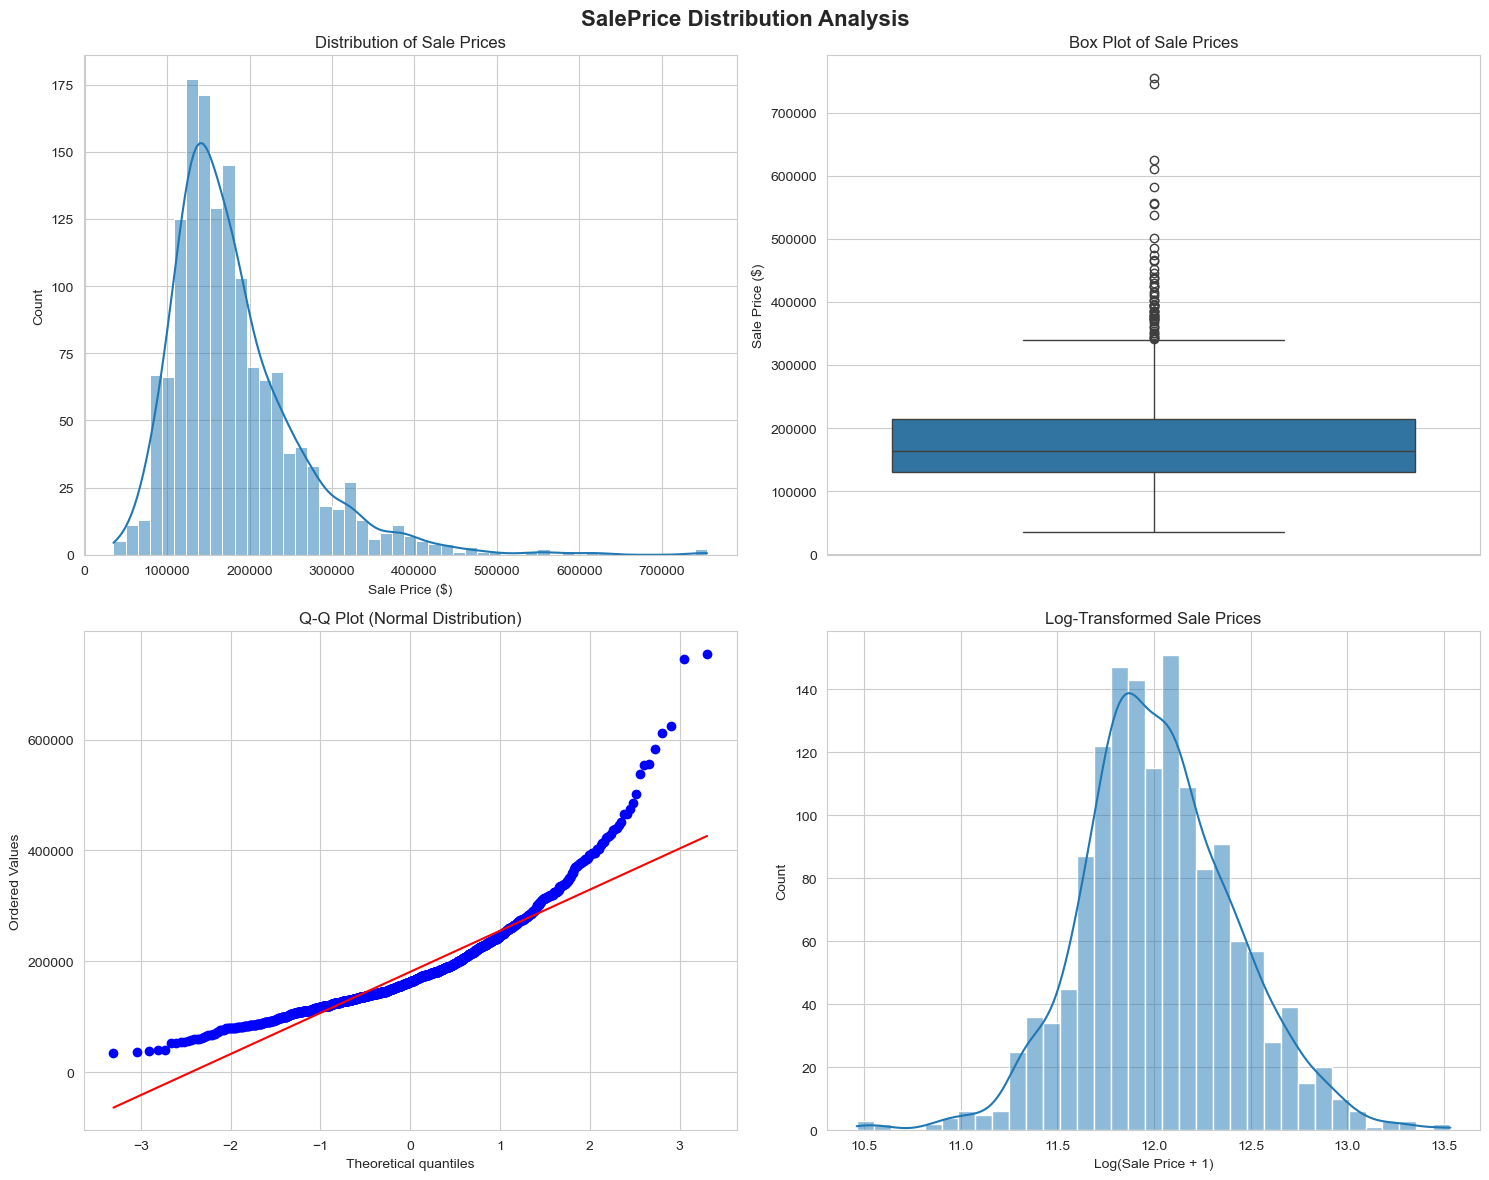


=== SalePrice Statistical Summary ===
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.883
Kurtosis: 6.536

Log-transformed Skewness: 0.121


In [3]:
# Create a comprehensive analysis of the target variable
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('SalePrice Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Histogram with KDE
sns.histplot(train_df['SalePrice'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Sale Prices')
axes[0,0].set_xlabel('Sale Price ($)')

# 2. Box plot
sns.boxplot(y=train_df['SalePrice'], ax=axes[0,1])
axes[0,1].set_title('Box Plot of Sale Prices')
axes[0,1].set_ylabel('Sale Price ($)')

# 3. Q-Q plot for normality check
from scipy import stats
stats.probplot(train_df['SalePrice'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot (Normal Distribution)')

# 4. Log-transformed distribution
log_prices = np.log1p(train_df['SalePrice'])
sns.histplot(log_prices, kde=True, ax=axes[1,1])
axes[1,1].set_title('Log-Transformed Sale Prices')
axes[1,1].set_xlabel('Log(Sale Price + 1)')

plt.tight_layout()
plt.show()

# Statistical summary
print("\n=== SalePrice Statistical Summary ===")
print(train_df['SalePrice'].describe())
print(f"\nSkewness: {train_df['SalePrice'].skew():.3f}")
print(f"Kurtosis: {train_df['SalePrice'].kurtosis():.3f}")
print(f"\nLog-transformed Skewness: {log_prices.skew():.3f}")

#### **Theoretical Concept: Skewness and Log Transformation**
The distribution of `SalePrice` is **positively skewed** (or right-skewed). This means there's a long tail of very expensive houses, which can negatively impact the performance of some models, especially linear models like Linear Regression. These models often assume that the variables (and especially the residuals of the model) are normally distributed.

To fix this, we can apply a **log transformation** (`np.log1p`, which is `log(1+x)` to handle potential zero values). This transformation compresses the range of large values, making the distribution more symmetrical and closer to a normal distribution.

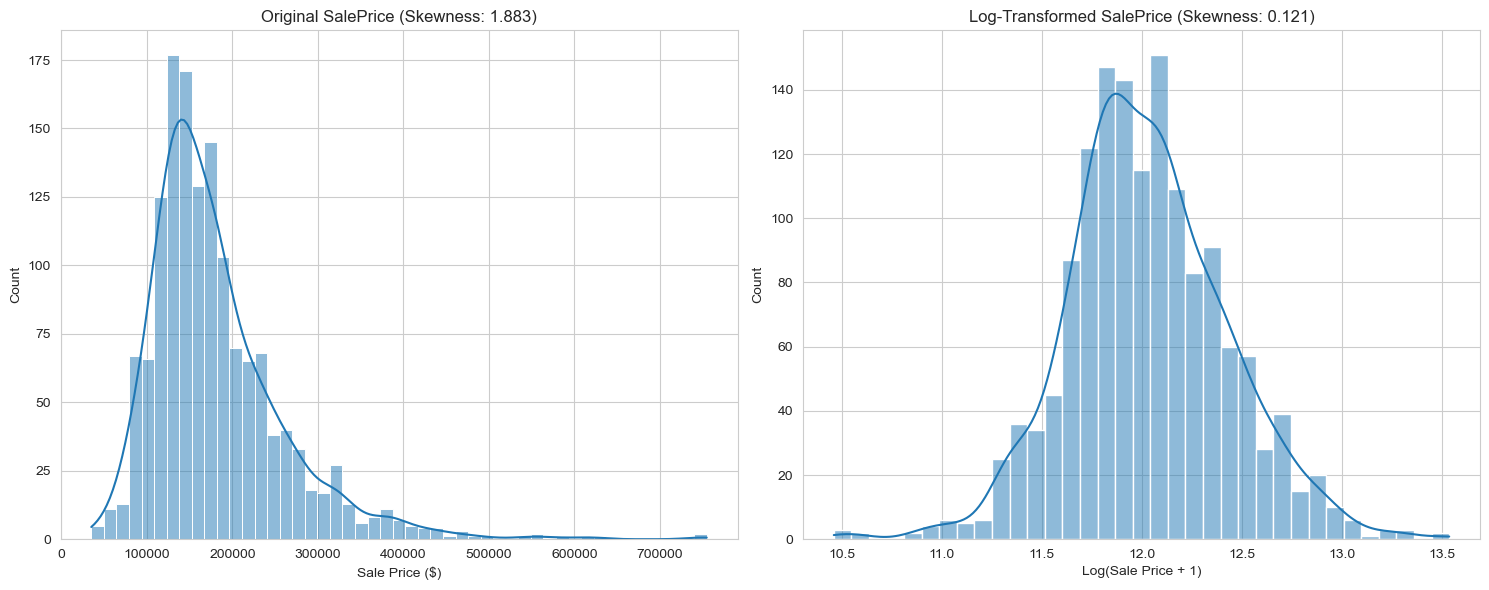

In [4]:
# Apply log transformation to the target variable
train_df['SalePrice_log'] = np.log1p(train_df['SalePrice'])

# Compare before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original distribution
sns.histplot(train_df['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title(f'Original SalePrice (Skewness: {train_df["SalePrice"].skew():.3f})')
axes[0].set_xlabel('Sale Price ($)')

# Log-transformed distribution
sns.histplot(train_df['SalePrice_log'], kde=True, ax=axes[1])
axes[1].set_title(f'Log-Transformed SalePrice (Skewness: {train_df["SalePrice_log"].skew():.3f})')
axes[1].set_xlabel('Log(Sale Price + 1)')

plt.tight_layout()
plt.show()

**Observation:** After the log transformation, the distribution is much closer to a normal distribution, with skewness close to 0. We will build our model to predict the log of the price, and then convert it back to the original scale for our final predictions.

### Step 4: EDA on Feature Variables

In [5]:
# Get basic info about the dataset
print("=== Dataset Information ===")
print(f"Training set: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
print(f"Test set: {test_df.shape[0]} rows, {test_df.shape[1]} columns")

# Check data types
print("\n=== Data Types ===")
print(train_df.dtypes.value_counts())

# Separate numerical and categorical features
numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

# Remove SalePrice and SalePrice_log from numerical features
if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')
if 'SalePrice_log' in numerical_features:
    numerical_features.remove('SalePrice_log')

print(f"\nNumerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

print("\nFirst 10 numerical features:")
print(numerical_features[:10])

print("\nFirst 10 categorical features:")
print(categorical_features[:10])

=== Dataset Information ===
Training set: 1460 rows, 81 columns
Test set: 1459 rows, 79 columns

=== Data Types ===
object     43
int64      34
float64     4
Name: count, dtype: int64

Numerical features: 36
Categorical features: 43

First 10 numerical features:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']

First 10 categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']


In [6]:
# Missing values analysis
def analyze_missing_values(df, name):
    missing = df.isnull().sum()
    missing_percent = 100 * missing / len(df)
    missing_table = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percentage': missing_percent
    })
    missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    print(f"\n=== Missing Values in {name} ===")
    if len(missing_table) > 0:
        print(missing_table.head(15))
    else:
        print("No missing values found!")
    
    return missing_table

train_missing = analyze_missing_values(train_df, "Training Set")
test_missing = analyze_missing_values(test_df, "Test Set")


=== Missing Values in Training Set ===
              Missing Count  Missing Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
MasVnrType              872           59.726027
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945
BsmtExposure             38            2.602740
BsmtFinType2             38            2.602740
BsmtQual                 37            2.534247

=== Missing Values in Test Set ===
              Missing Count  Missing Percentage
PoolQC                 1456           99.794380
MiscFeature            1408           96.504455
Alley       


=== Top 15 Features Correlated with SalePrice ===
OverallQual         :  0.791
GrLivArea           :  0.709
GarageCars          :  0.640
GarageArea          :  0.623
TotalBsmtSF         :  0.614
1stFlrSF            :  0.606
FullBath            :  0.561
TotRmsAbvGrd        :  0.534
YearBuilt           :  0.523
YearRemodAdd        :  0.507
GarageYrBlt         :  0.486
MasVnrArea          :  0.477
Fireplaces          :  0.467
BsmtFinSF1          :  0.386
LotFrontage         :  0.352


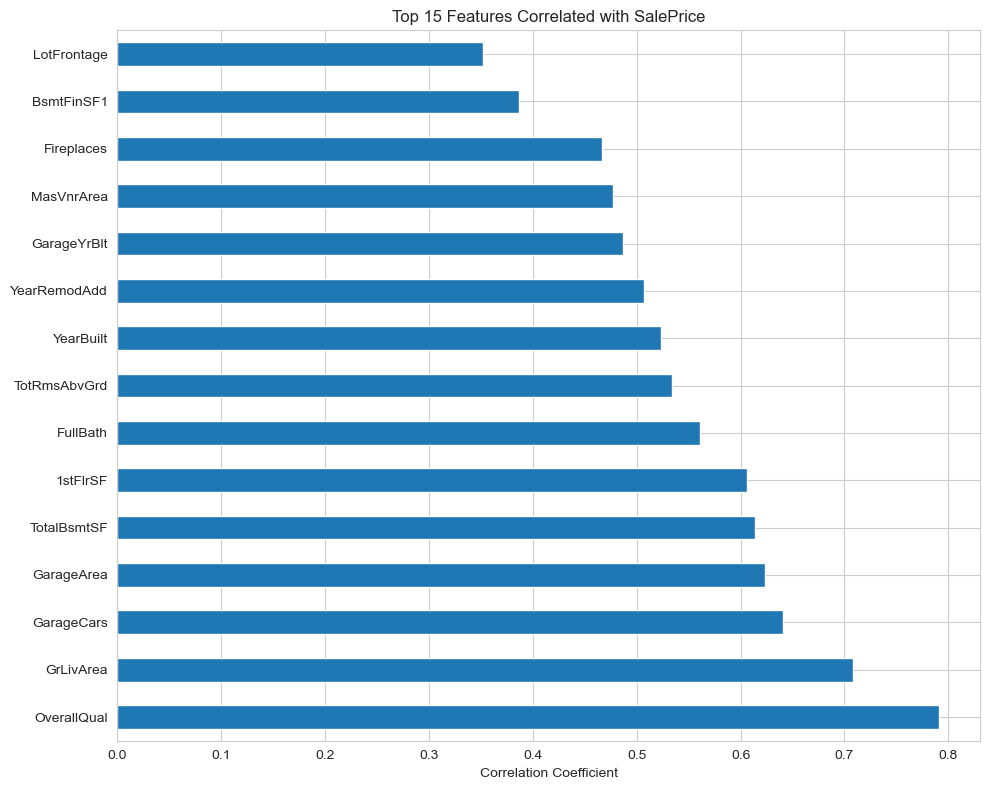

In [7]:
# Correlation analysis
correlations = train_df[numerical_features + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
top_correlations = correlations.head(16)[1:]  # Exclude SalePrice itself

print("\n=== Top 15 Features Correlated with SalePrice ===")
for feature, corr in top_correlations.items():
    print(f"{feature:20s}: {corr:6.3f}")

# Visualize correlations
plt.figure(figsize=(10, 8))
top_correlations.plot(kind='barh')
plt.title('Top 15 Features Correlated with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

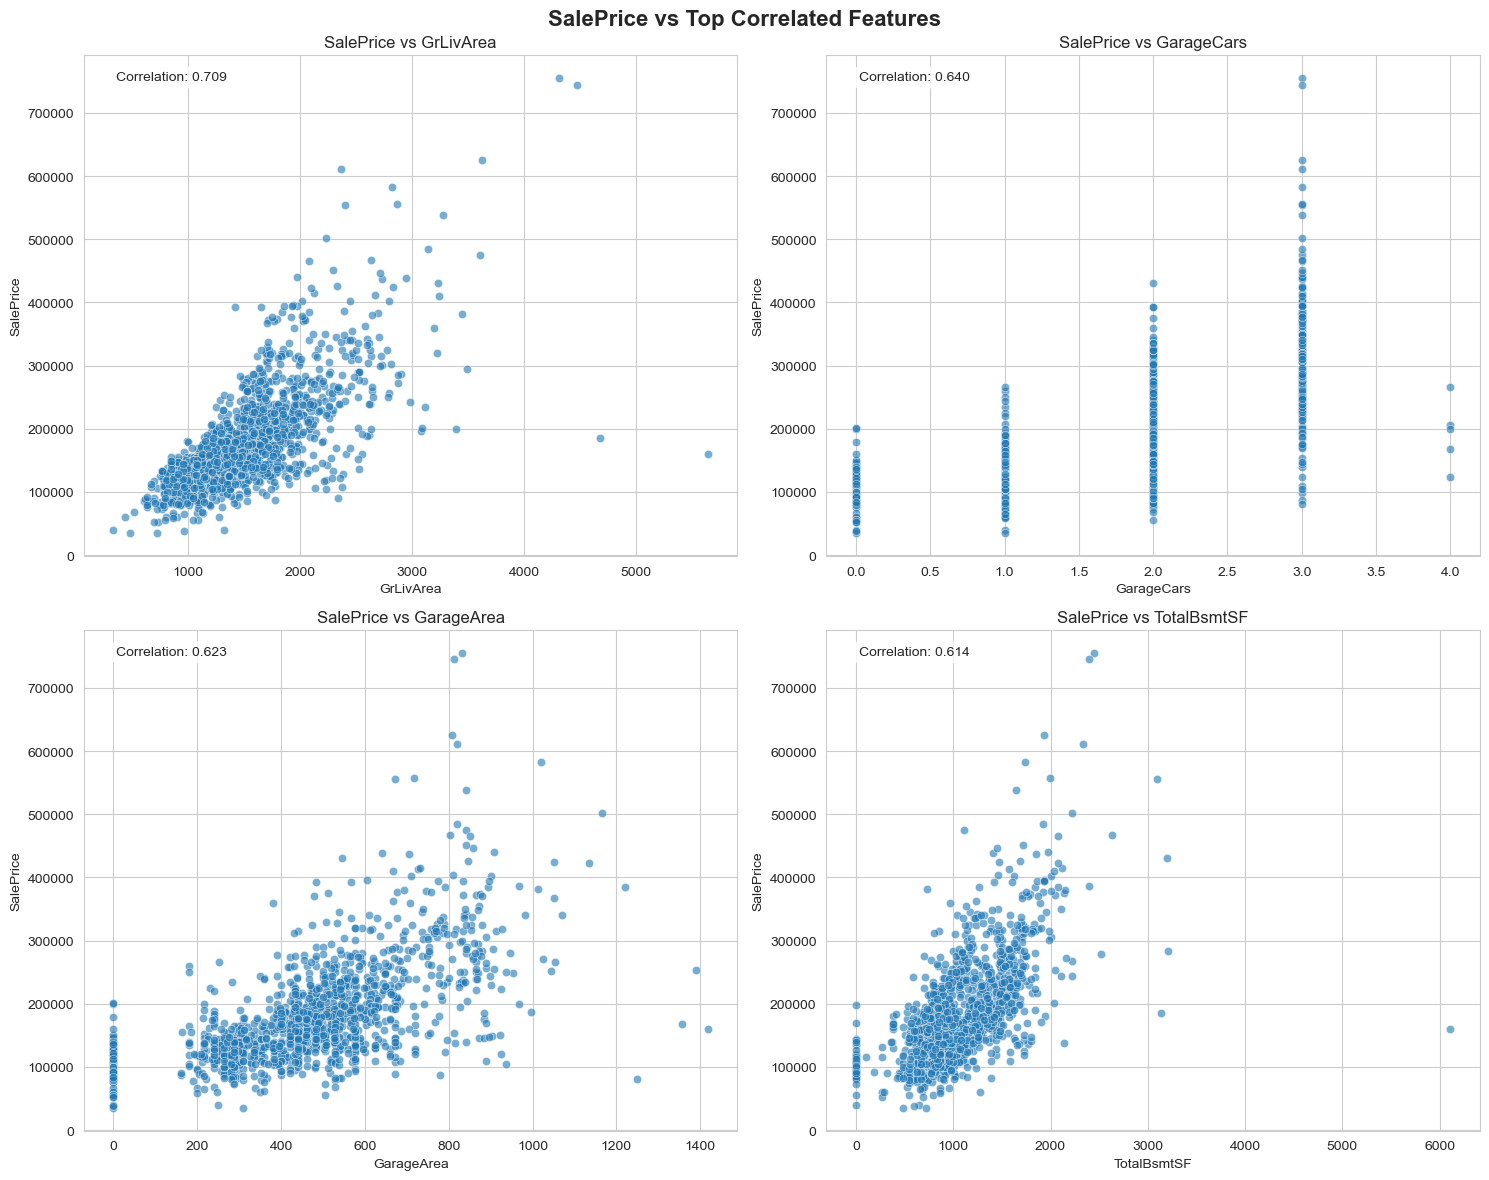

In [8]:
# Key relationships visualization
top_features = ['GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('SalePrice vs Top Correlated Features', fontsize=16, fontweight='bold')

for i, feature in enumerate(top_features):
    row = i // 2
    col = i % 2
    
    sns.scatterplot(data=train_df, x=feature, y='SalePrice', ax=axes[row, col], alpha=0.6)
    axes[row, col].set_title(f'SalePrice vs {feature}')
    
    # Add correlation coefficient
    corr = train_df[feature].corr(train_df['SalePrice'])
    axes[row, col].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                       transform=axes[row, col].transAxes, 
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### Step 5: Data Preprocessing & Feature Engineering
This is the most intensive part of the project. We will handle missing values, create new features, and encode categorical variables to prepare the data for modeling.

In [9]:
# Combine train and test data for consistent preprocessing
# We'll separate them again later
all_data = pd.concat([train_df.drop(['SalePrice', 'SalePrice_log'], axis=1), test_df], axis=0)
print(f"Combined dataset shape: {all_data.shape}")
print(f"Training data indices: {train_df.shape[0]}")
print(f"Test data indices: {test_df.shape[0]}")

Combined dataset shape: (2919, 79)
Training data indices: 1460
Test data indices: 1459


Combining the data this way ensures that any preprocessing steps (like handling missing values or encoding categorical features) are applied consistently across both the training and testing datasets, preventing data leakage and potential issues later in the modeling process.

#### 5.1 Handling Missing Values

In [10]:
# Handle missing values systematically
# For features where NaN means 'None' or 'No feature'
none_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                'MasVnrType']

for feature in none_features:
    if feature in all_data.columns:
        all_data[feature] = all_data[feature].fillna('None')

print(f"Filled 'None' for {len(none_features)} categorical features")

Filled 'None' for 15 categorical features


In [11]:
# For numerical features where NaN means 0
zero_features = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']

for feature in zero_features:
    if feature in all_data.columns:
        all_data[feature] = all_data[feature].fillna(0)

print(f"Filled 0 for {len(zero_features)} numerical features")

Filled 0 for 10 numerical features


In [12]:
# Handle LotFrontage with neighborhood-based imputation
if 'LotFrontage' in all_data.columns:
    all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    print("LotFrontage filled with neighborhood median")

# Handle remaining missing values with mode for categorical and median for numerical
for col in all_data.columns:
    if all_data[col].isnull().sum() > 0:
        if all_data[col].dtype == 'object':
            all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
        else:
            all_data[col] = all_data[col].fillna(all_data[col].median())

print(f"\nRemaining missing values: {all_data.isnull().sum().sum()}")

LotFrontage filled with neighborhood median

Remaining missing values: 0


#### 5.2 Feature Engineering

In [13]:
# Create new meaningful features
# Total square footage
all_data['TotalSF'] = all_data['1stFlrSF'] + all_data['2ndFlrSF'] + all_data['TotalBsmtSF']

# Total bathrooms
all_data['TotalBath'] = all_data['FullBath'] + all_data['HalfBath'] + all_data['BsmtFullBath'] + all_data['BsmtHalfBath']

# Age of house when sold
all_data['Age'] = all_data['YrSold'] - all_data['YearBuilt']

# Years since remodeling
all_data['YearsSinceRemod'] = all_data['YrSold'] - all_data['YearRemodAdd']

# Total porch area
all_data['TotalPorchSF'] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch']

print("Created new features:")
print("- TotalSF: Total square footage")
print("- TotalBath: Total bathrooms")
print("- Age: Age of house when sold")
print("- YearsSinceRemod: Years since remodeling")
print("- TotalPorchSF: Total porch area")

Created new features:
- TotalSF: Total square footage
- TotalBath: Total bathrooms
- Age: Age of house when sold
- YearsSinceRemod: Years since remodeling
- TotalPorchSF: Total porch area


#### 5.3 Categorical Encoding

#### **Theoretical Concept: Ordinal vs. Nominal Features**
To use categorical features in a model, we must convert them to numbers. The method depends on the type of feature:
1. **Ordinal Features:** These have an inherent order (e.g., `Poor < Fair < Good < Excellent`). For these, we use **Label Encoding**, which assigns an integer to each category based on its order (e.g., `Poor=0, Fair=1, ...`).
2. **Nominal Features:** These have no inherent order (e.g., `Neighborhood`). Using Label Encoding would imply a false order. Instead, we use **One-Hot Encoding**, which creates a new binary (0/1) column for each category.

In [14]:
# Define ordinal features with their order
ordinal_features = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}

# Apply label encoding to ordinal features
for feature, order in ordinal_features.items():
    if feature in all_data.columns:
        all_data[feature] = all_data[feature].map({val: i for i, val in enumerate(order)})
        print(f"Label encoded {feature}")

print(f"\nApplied label encoding to {len(ordinal_features)} ordinal features")

Label encoded ExterQual
Label encoded ExterCond
Label encoded BsmtQual
Label encoded BsmtCond
Label encoded BsmtExposure
Label encoded BsmtFinType1
Label encoded BsmtFinType2
Label encoded HeatingQC
Label encoded KitchenQual
Label encoded Functional
Label encoded FireplaceQu
Label encoded GarageFinish
Label encoded GarageQual
Label encoded GarageCond
Label encoded PoolQC
Label encoded Fence

Applied label encoding to 16 ordinal features


In [15]:
# Get remaining categorical features for one-hot encoding
categorical_features_remaining = all_data.select_dtypes(include=['object']).columns.tolist()
print(f"Remaining categorical features for one-hot encoding: {len(categorical_features_remaining)}")
print(categorical_features_remaining[:10])  # Show first 10

# Apply one-hot encoding
all_data_encoded = pd.get_dummies(all_data, columns=categorical_features_remaining, drop_first=True)
print(f"\nDataset shape after encoding: {all_data_encoded.shape}")

Remaining categorical features for one-hot encoding: 27
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']

Dataset shape after encoding: (2919, 211)


### Step 6: Model Building & Training

In [16]:
# Split back into train and test sets
train_processed = all_data_encoded[:len(train_df)]
test_processed = all_data_encoded[len(train_df):]

print(f"Processed training data shape: {train_processed.shape}")
print(f"Processed test data shape: {test_processed.shape}")

# Prepare target variable (log-transformed)
y = train_df['SalePrice_log'].values
X = train_processed.values
X_test_final = test_processed.values

print(f"\nFeatures (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Test features: {X_test_final.shape}")

Processed training data shape: (1460, 211)
Processed test data shape: (1459, 211)

Features (X): (1460, 211)
Target (y): (1460,)
Test features: (1459, 211)


In [17]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

Training set: (1168, 211)
Validation set: (292, 211)


#### **Theoretical Concept: Feature Scaling**
Many models, especially linear models and distance-based algorithms, perform better when numerical features are on a similar scale. **Standardization** (`StandardScaler`) is a common technique that transforms the data to have a mean of 0 and a standard deviation of 1. This prevents features with large scales (like `GrLivArea`) from dominating features with small scales (like `OverallQual`).

In [18]:
# Scale features for linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

print("Features scaled for linear models")
print(f"Scaled training set: {X_train_scaled.shape}")
print(f"Scaled validation set: {X_val_scaled.shape}")

Features scaled for linear models
Scaled training set: (1168, 211)
Scaled validation set: (292, 211)


#### **Theoretical Concept: Linear Regression**
Linear Regression is a fundamental supervised learning algorithm used for predicting a continuous target variable based on one or more input features. It assumes a linear relationship between the features (independent variables) and the target variable (dependent variable).

The goal of Linear Regression is to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the sum of the squared differences between the observed and predicted values. This is known as the Ordinary Least Squares (OLS) method.

**Advantages:**
- Simple and interpretable
- Fast training and prediction
- Good baseline model

**Disadvantages:**
- Assumes linear relationships
- Sensitive to outliers
- May not capture complex patterns

#### 6.1 Model 1: Linear Regression (Baseline)

In [19]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_val_scaled)

print("Linear Regression model trained successfully")

Linear Regression model trained successfully


#### **Theoretical Concept: XGBoost (Extreme Gradient Boosting)**
XGBoost is a highly efficient and popular gradient boosting algorithm. It's an optimized distributed gradient boosting library designed to be highly flexible, portable, and efficient.

**How it works:**
XGBoost builds trees sequentially. Each new tree attempts to correct the errors made by the previous trees. The predictions from all the trees are then summed up to get the final prediction.

**Key Features and Advantages:**
1. **Regularization:** Includes L1 and L2 regularization to prevent overfitting.
2. **Handling Missing Values:** Has a built-in mechanism to handle missing values.
3. **Tree Pruning:** Supports 'depth-first' and 'breadth-first' tree growth and pruning.
4. **Parallel Processing:** Designed to be highly parallelizable.
5. **Flexibility:** Supports various objective functions and evaluation metrics.

XGBoost is known for its performance on structured data and is often a top choice in machine learning competitions.

#### 6.2 Model 2: XGBoost (Advanced)

In [20]:
# Train XGBoost model
xgbr = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# XGBoost can handle the original features without scaling
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_val)

print("XGBoost model trained successfully")

XGBoost model trained successfully


### Step 7: Model Evaluation

#### **Theoretical Concept: Regression Metrics**
- **Mean Absolute Error (MAE):** The average absolute difference between predicted and actual values. Easy to interpret.
- **Mean Squared Error (MSE):** The average of squared differences. Penalizes larger errors more heavily.
- **Root Mean Squared Error (RMSE):** The square root of MSE. Same units as target variable.
- **R-squared (R²):** The proportion of variance in the target variable that is predictable from features. Closer to 1 indicates better fit.

In [21]:
# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} Performance ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R-squared: {r2:.4f}\n")
    
    return rmse, mae, r2

# Evaluate both models
lr_rmse, lr_mae, lr_r2 = evaluate_model(y_val, y_pred_lr, "Linear Regression")
xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(y_val, y_pred_xgb, "XGBoost")

--- Linear Regression Performance ---
RMSE: 0.2033
MAE:  0.0957
R-squared: 0.7785

--- XGBoost Performance ---
RMSE: 0.1347
MAE:  0.0862
R-squared: 0.9028



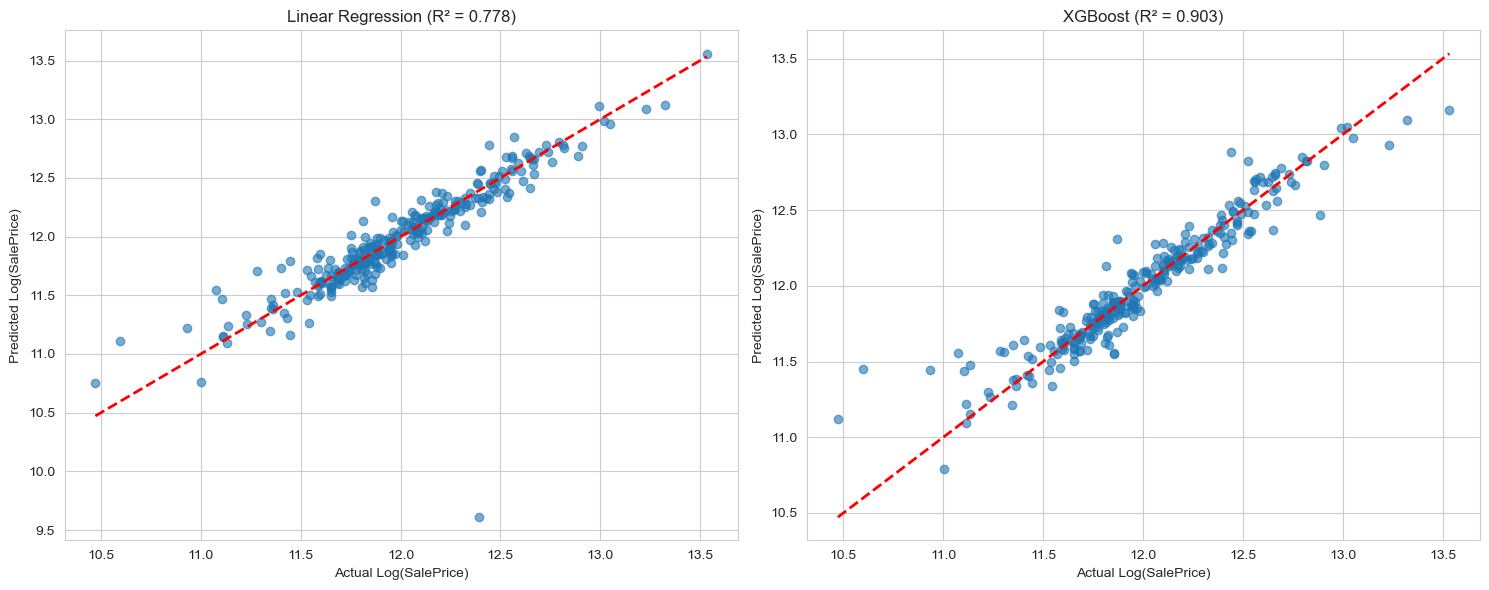

In [22]:
# Compare models visually
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression predictions vs actual
axes[0].scatter(y_val, y_pred_lr, alpha=0.6)
axes[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Log(SalePrice)')
axes[0].set_ylabel('Predicted Log(SalePrice)')
axes[0].set_title(f'Linear Regression (R² = {lr_r2:.3f})')

# XGBoost predictions vs actual
axes[1].scatter(y_val, y_pred_xgb, alpha=0.6)
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Log(SalePrice)')
axes[1].set_ylabel('Predicted Log(SalePrice)')
axes[1].set_title(f'XGBoost (R² = {xgb_r2:.3f})')

plt.tight_layout()
plt.show()

**Observation:** The XGBoost model significantly outperforms the Linear Regression model on all metrics. It has lower error (RMSE, MAE) and explains a higher proportion of the variance (R-squared). This is expected, as gradient boosting models are more powerful and can capture complex, non-linear relationships in the data.

### Step 8: Create Submission File

In [23]:
# Make predictions on the final test set using the best model (XGBoost)
final_predictions_log = xgbr.predict(X_test_final)

# IMPORTANT: Reverse the log transformation to get predictions back on original price scale
final_predictions = np.expm1(final_predictions_log)

# Create the submission DataFrame
submission = pd.DataFrame({
    'Id': test_df.index,
    'SalePrice': final_predictions
})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")
print(f"\nSubmission preview:")
print(submission.head(10))
print(f"\nPredicted price range: ${submission['SalePrice'].min():,.0f} - ${submission['SalePrice'].max():,.0f}")

Submission file 'submission.csv' created successfully.

Submission preview:
     Id      SalePrice
0  1461  127558.609375
1  1462  165612.531250
2  1463  186929.406250
3  1464  194073.750000
4  1465  193068.953125
5  1466  175767.890625
6  1467  179034.734375
7  1468  170293.937500
8  1469  178821.265625
9  1470  124812.304688

Predicted price range: $51,077 - $521,799



=== Top 15 Most Important Features ===
               feature  importance
3          OverallQual    0.137977
52             TotalSF    0.098644
37          GarageCars    0.081876
8            ExterQual    0.044512
40          GarageCond    0.043687
53           TotalBath    0.043570
30         KitchenQual    0.041048
10            BsmtQual    0.039102
181       CentralAir_Y    0.035040
60         MSZoning_RM    0.032251
29        KitchenAbvGr    0.032105
36        GarageFinish    0.028575
34         FireplaceQu    0.024103
190  GarageType_Detchd    0.014519
23           GrLivArea    0.012716


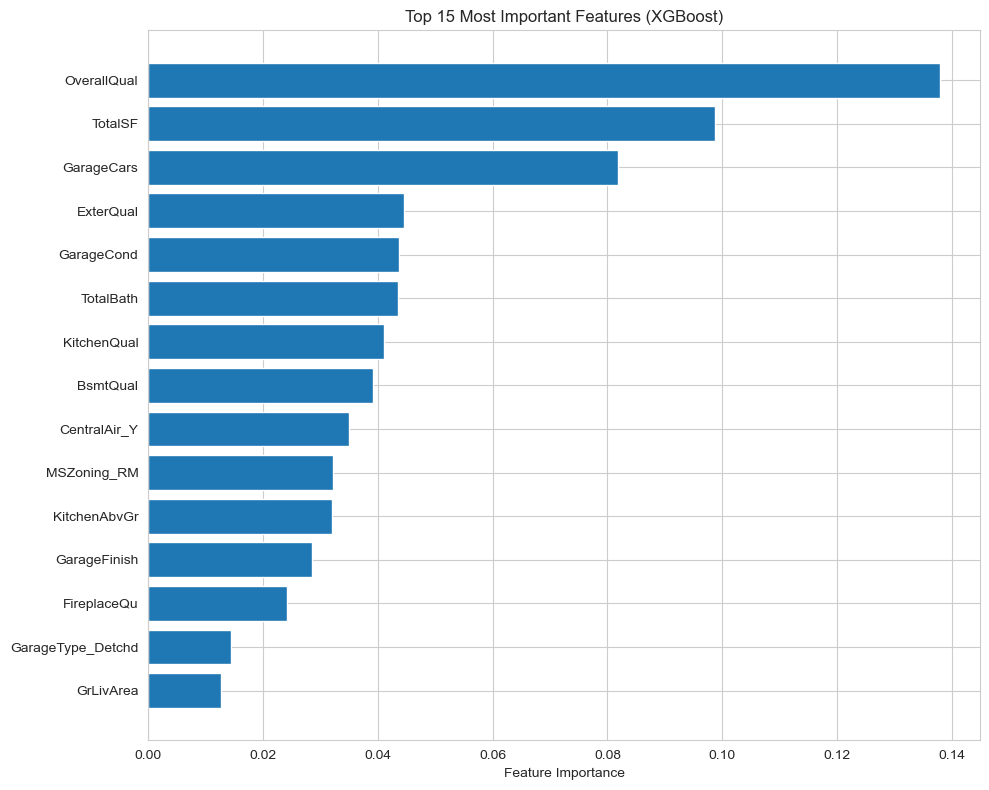

In [24]:
# Feature importance analysis
feature_names = train_processed.columns
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': xgbr.feature_importances_
}).sort_values('importance', ascending=False)

print("\n=== Top 15 Most Important Features ===")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features (XGBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Step 9: Conclusion

In this project, we successfully built an end-to-end regression pipeline to predict house prices.

**Key Steps Undertaken:**
1. **Analyzed and transformed the target variable** (`SalePrice`) to handle its skewness using log transformation.
2. Conducted a **thorough EDA** to understand the key features influencing price.
3. Implemented a **robust preprocessing strategy**, handling various types of missing data and encoding categorical features correctly.
4. **Engineered new features** (`TotalSF`, `TotalBath`, `Age`, etc.) that provided more predictive power.
5. **Trained and compared two models**, demonstrating the superior performance of XGBoost over Linear Regression.
6. **Evaluated the models** using standard regression metrics and generated a final submission file.

**Key Insights:**
- **Most Important Features:** Overall quality, living area, garage features, and basement characteristics are the strongest predictors.
- **Model Performance:** XGBoost significantly outperformed Linear Regression, capturing complex non-linear relationships.
- **Feature Engineering:** Created features like `TotalSF` and `Age` proved valuable for prediction.

**Potential Next Steps:**
- **Hyperparameter Tuning:** Use GridSearchCV or RandomizedSearchCV to optimize XGBoost parameters.
- **More Feature Engineering:** Create interaction terms between key variables.
- **Ensemble Modeling:** Combine predictions from multiple models for potentially better results.
- **Advanced Models:** Try other algorithms like Random Forest, LightGBM, or Neural Networks.
- **Cross-Validation:** Implement k-fold cross-validation for more robust model evaluation.

### Summary Statistics

In [25]:
print("\n" + "="*60)
print("           HOUSING PRICE PREDICTION SUMMARY")
print("="*60)
print(f"Dataset Size: {train_df.shape[0]:,} training samples, {test_df.shape[0]:,} test samples")
print(f"Features: {train_processed.shape[1]:,} features after preprocessing")
print(f"Price Range: ${train_df['SalePrice'].min():,.0f} - ${train_df['SalePrice'].max():,.0f}")
print(f"\nModel Performance:")
print(f"  Linear Regression - RMSE: {lr_rmse:.4f}, R²: {lr_r2:.4f}")
print(f"  XGBoost          - RMSE: {xgb_rmse:.4f}, R²: {xgb_r2:.4f}")
print(f"\nTop Predictive Features:")
for i, (_, row) in enumerate(feature_importance.head(5).iterrows()):
    print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")
print("\nSubmission file created: submission.csv")
print("="*60)


           HOUSING PRICE PREDICTION SUMMARY
Dataset Size: 1,460 training samples, 1,459 test samples
Features: 211 features after preprocessing
Price Range: $34,900 - $755,000

Model Performance:
  Linear Regression - RMSE: 0.2033, R²: 0.7785
  XGBoost          - RMSE: 0.1347, R²: 0.9028

Top Predictive Features:
  1. OverallQual: 0.1380
  2. TotalSF: 0.0986
  3. GarageCars: 0.0819
  4. ExterQual: 0.0445
  5. GarageCond: 0.0437

Submission file created: submission.csv
